[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'Macklemore & Ryan Lewis': 0.36113333333333336, 'Imagine Dragons': 0.27843333333333337, 'Bruno Mars': 0.9963333333333333, 'Rihanna': 0.8066999999999999, 'Maroon 5': 0.9642666666666666}, {'Katy Perry': 0.9977333333333332, 'Iggy Azalea': 0.99495, 'Jason Derulo': 0.2700666666666667, 'Ariana Grande': -0.0031500000000000417, 'Lorde': 0.93125}, {'Ed Sheeran': 0.9918999999999999, 'Fetty Wap': 0.31706666666666666, 'Taylor Swift': -0.16727999999999998, 'The Weeknd': 0.3354333333333333, 'Meghan Trainor': 0.95975}, {'Justin Bieber': 0.9710666666666666, 'Drake': 0.8428600000000002, 'Twenty One Pilots': 0.9854333333333333, 'Adele': 0.3367333333333333, 'The Chainsmokers': 0.9756}, {'Ed Sheeran': 0.9556500000000001, 'Bruno Mars': 0.050449999999999995, 'Kendrick Lamar': -0.3247333333333334, 'Migos': -0.9869, 'DJ Khaled': 0.97895}, {'Drake': -0.32658, 'Camila Cabello': -0.055499999999999994, 'Post Malone': 0.0003750000000000142, 'Maroon 5': 0.9958999999999999, 'Imagine Dragons': 0.389325}, {'Lil Nas 

/tmp/ipykernel_772/2751994953.py:119: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/root/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


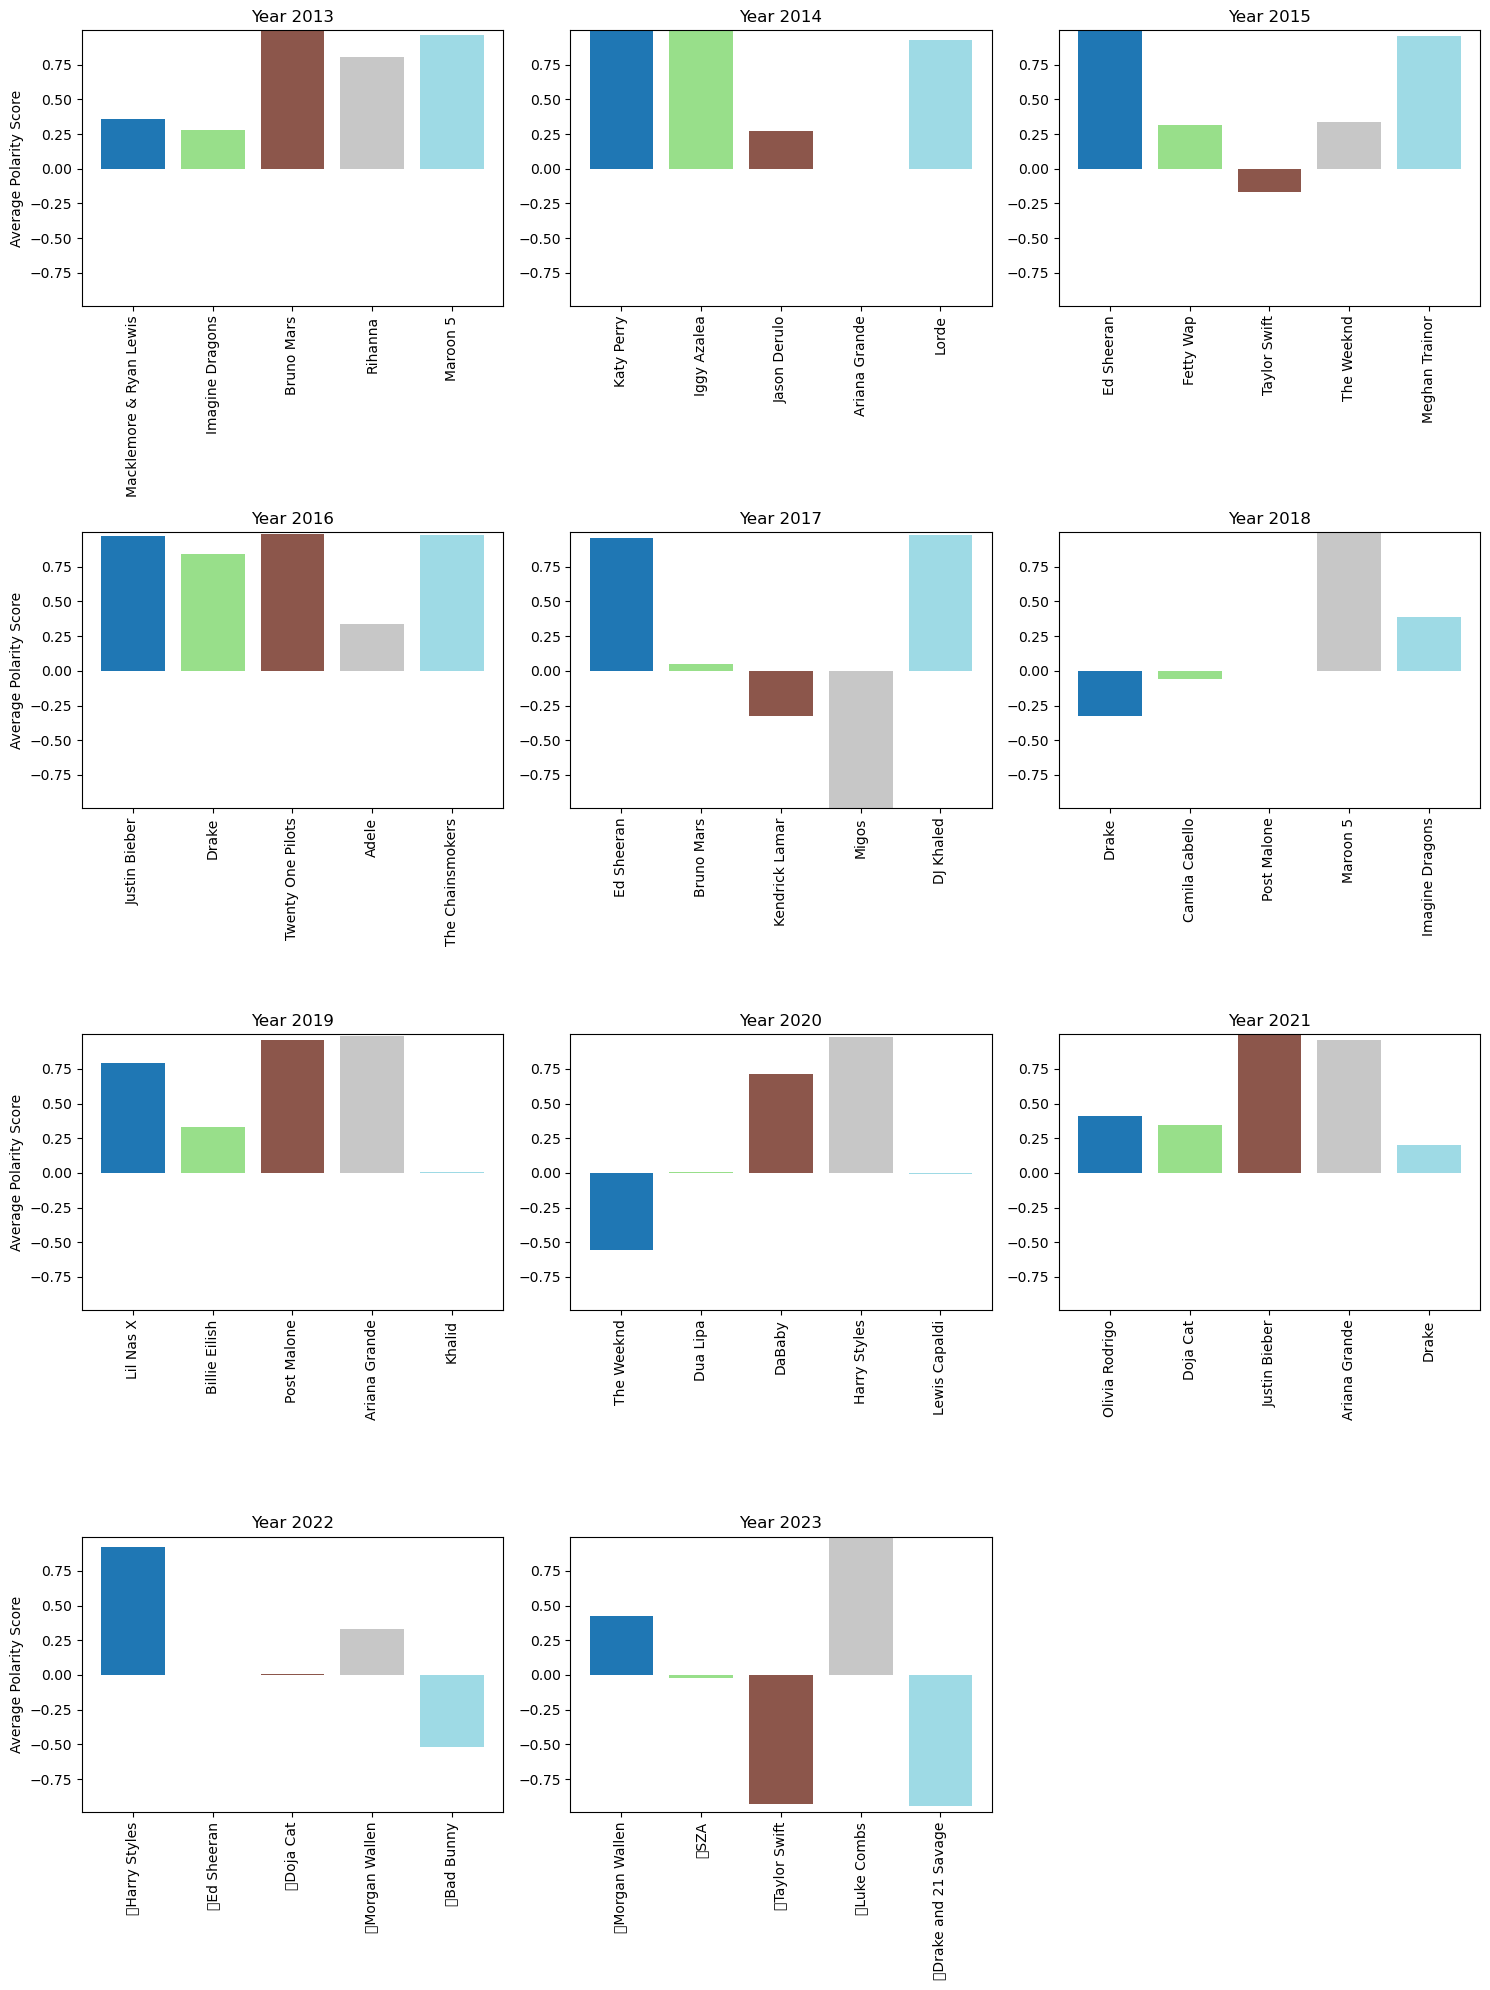

In [1]:
# Step 1: Assign Scores Based on Ranking
# input variables: song rankings, and name of the artists

import helper_function
import pandas as pd
import csv

top_artist_polarityscore = []

# loaded_data = pd.read_csv('billboard_data_with_lyrics')
# scores_by_artist = {}
# artists = helpers.generate(loaded_data)
# print(artists)

# for i in range(100):
#     score = 101 - i  # Calculate the score based on ranking
#     artist = artists[i]
#     if artist in scores_by_artist:
#         scores_by_artist[artist] += score
#     else:
#         scores_by_artist[artist] = score




with open("billboard_data_with_lyrics.csv", mode='r', encoding='utf-8') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Convert it to a list to get the ability to use len() and indexing
    rows = list(csv_reader)
    
    # Now you can iterate using indices
    for j in range(11):
        scores_by_artist = {}
        for i in range(100):
            score = 101 - i  # Calculate the score based on ranking
            artist = rows[j * 100 + i][2]
            if artist in scores_by_artist:
                scores_by_artist[artist] += score
            else:
                scores_by_artist[artist] = score
        # Step 2 & 3: Sort Artists by Total Score
        sorted_artists = sorted(
            scores_by_artist.items(), key=lambda x: x[1], reverse=True
        )


        # Step 4: Select the Top 5 Artists
        top_5_artists = sorted_artists[:5]
        top_5_artist_names = [artist[0] for artist in top_5_artists]
       

        polarity_score = {}
        polarity_count = {}
        #print(top_5_artist_names)
        for i in range(100):
            artist = rows[j * 100 + i][2]
          
            if (artist in top_5_artist_names) == False:
                continue 
            # else:
                # print(artist)
                # print(top_5_artist_names)
                # print(artist in top_5_artist_names)

            
            if artist in polarity_score:
                
                polarity_score[artist] += helper_function.POLARITY(rows[j * 100 + i][4])['compound']
                polarity_count[artist] += 1
            else:
                
                polarity_score[artist] = helper_function.POLARITY(rows[j * 100 + i][4])['compound']
                polarity_count[artist] = 1
        
        for x, y in polarity_score.items():
            #print(polarity_score[x], polarity_count[x])
            polarity_score[x] /= polarity_count[x]
        #print(len(polarity_score))
        top_artist_polarityscore.append(polarity_score)

print(top_artist_polarityscore)

import matplotlib.pyplot as plt
import numpy as np


extended_data = top_artist_polarityscore

# Determine global min and max polarity scores for consistent y-axis limits
all_scores = [score for yearly_data in extended_data for score in yearly_data.values()]
global_min = min(all_scores)
global_max = max(all_scores)
ncols = 3
nrows = len(top_artist_polarityscore) // ncols + (len(top_artist_polarityscore) % ncols > 0)
# Create a large figure to hold all subplots
plt.figure(figsize=(ncols * 5, nrows * 5))  # Width and height of entire figure

for i, yearly_data in enumerate(extended_data, start=1):
    ax = plt.subplot(nrows, ncols, i)
    artists = list(yearly_data.keys())
    scores = list(yearly_data.values())
    y_pos = np.arange(len(artists))

    ax.bar(y_pos, scores, color=plt.cm.tab20(np.linspace(0, 1, len(artists))))
    ax.set_xticks(y_pos)
    ax.set_xticklabels(artists, rotation=90)
    ax.set_title(f'Year {2013 + i - 1}')

    # Set the same y-axis limit for all subplots
    ax.set_ylim(global_min, global_max)

    # Set the y-axis label only for the leftmost subplots
    if i % ncols == 1:
        ax.set_ylabel('Average Polarity Score')

# Adjust the layout so labels and titles do not overlap
plt.tight_layout()

# Display the visualization
plt.show()






[{'Macklemore & Ryan Lewis': 0.36113333333333336, 'Imagine Dragons': 0.27843333333333337, 'Bruno Mars': 0.9963333333333333, 'Rihanna': 0.8066999999999999, 'Maroon 5': 0.9642666666666666}, {'Katy Perry': 0.9977333333333332, 'Iggy Azalea': 0.99495, 'Jason Derulo': 0.2700666666666667, 'Ariana Grande': -0.0031500000000000417, 'Lorde': 0.93125}, {'Ed Sheeran': 0.9918999999999999, 'Fetty Wap': 0.31706666666666666, 'Taylor Swift': -0.16727999999999998, 'The Weeknd': 0.3354333333333333, 'Meghan Trainor': 0.95975}, {'Justin Bieber': 0.9710666666666666, 'Drake': 0.8428600000000002, 'Twenty One Pilots': 0.9854333333333333, 'Adele': 0.3367333333333333, 'The Chainsmokers': 0.9756}, {'Ed Sheeran': 0.9556500000000001, 'Bruno Mars': 0.050449999999999995, 'Kendrick Lamar': -0.3247333333333334, 'Migos': -0.9869, 'DJ Khaled': 0.97895}, {'Drake': -0.32658, 'Camila Cabello': -0.055499999999999994, 'Post Malone': 0.0003750000000000142, 'Maroon 5': 0.9958999999999999, 'Imagine Dragons': 0.389325}, {'Lil Nas 

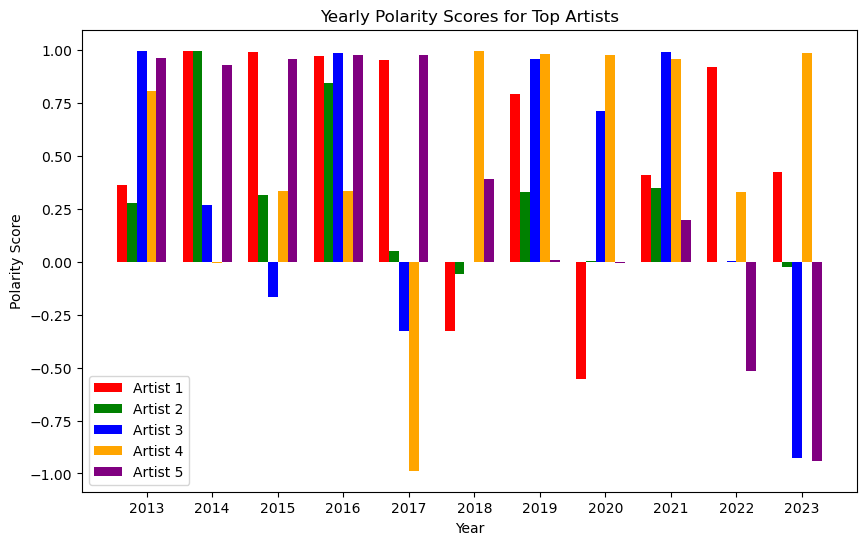

In [2]:
# Step 1: Assign Scores Based on Ranking
# input variables: song rankings, and name of the artists

import helper_function
import pandas as pd
import csv

top_artist_polarityscore = []

# loaded_data = pd.read_csv('billboard_data_with_lyrics')
# scores_by_artist = {}
# artists = helpers.generate(loaded_data)
# print(artists)

# for i in range(100):
#     score = 101 - i  # Calculate the score based on ranking
#     artist = artists[i]
#     if artist in scores_by_artist:
#         scores_by_artist[artist] += score
#     else:
#         scores_by_artist[artist] = score




with open("billboard_data_with_lyrics.csv", mode='r', encoding='utf-8') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Convert it to a list to get the ability to use len() and indexing
    rows = list(csv_reader)
    
    # Now you can iterate using indices
    for j in range(11):
        scores_by_artist = {}
        for i in range(100):
            score = 101 - i  # Calculate the score based on ranking
            artist = rows[j * 100 + i][2]
            if artist in scores_by_artist:
                scores_by_artist[artist] += score
            else:
                scores_by_artist[artist] = score
        # Step 2 & 3: Sort Artists by Total Score
        sorted_artists = sorted(
            scores_by_artist.items(), key=lambda x: x[1], reverse=True
        )


        # Step 4: Select the Top 5 Artists
        top_5_artists = sorted_artists[:5]
        top_5_artist_names = [artist[0] for artist in top_5_artists]
       

        polarity_score = {}
        polarity_count = {}
        #print(top_5_artist_names)
        for i in range(100):
            artist = rows[j * 100 + i][2]
          
            if (artist in top_5_artist_names) == False:
                continue 
            # else:
                # print(artist)
                # print(top_5_artist_names)
                # print(artist in top_5_artist_names)

            
            if artist in polarity_score:
                
                polarity_score[artist] += helper_function.POLARITY(rows[j * 100 + i][4])['compound']
                polarity_count[artist] += 1
            else:
                
                polarity_score[artist] = helper_function.POLARITY(rows[j * 100 + i][4])['compound']
                polarity_count[artist] = 1
        
        for x, y in polarity_score.items():
            #print(polarity_score[x], polarity_count[x])
            polarity_score[x] /= polarity_count[x]
        #print(len(polarity_score))
        top_artist_polarityscore.append(polarity_score)

print(top_artist_polarityscore)


import matplotlib.pyplot as plt
import numpy as np

# Assuming top_artist_polarityscore is given as a list of dictionaries
# Each dictionary corresponds to a year and maps artist names to polarity scores

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Define the number of bars per group (one bar per artist per year) and the bar width
num_artists = 5  # Number of top artists
bar_width = 0.15

# Define x locations for the groups
year_indices = np.arange(len(top_artist_polarityscore))

# Define colors for each artist
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Loop over the years and plot bars for each artist
for i, yearly_data in enumerate(top_artist_polarityscore):
    artist_indices = np.arange(num_artists)  # 5 artists
    scores = list(yearly_data.values())[:num_artists]  # Get the scores for the top 5 artists
    # Plot each artist's score for the year
    for j in range(num_artists):
        ax.bar(year_indices[i] + (j - num_artists / 2) * bar_width, scores[j], 
               width=bar_width, color=colors[j], label=f'Artist {j+1}' if i == 0 else "")

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Polarity Score')
ax.set_title('Yearly Polarity Scores for Top Artists')
ax.set_xticks(year_indices)
ax.set_xticklabels([str(year) for year in range(2013, 2013 + len(top_artist_polarityscore))])
ax.legend()

# Show the plot
plt.show()



[{'Macklemore & Ryan Lewis': 0.36113333333333336, 'Imagine Dragons': 0.27843333333333337, 'Bruno Mars': 0.9963333333333333, 'Rihanna': 0.8066999999999999, 'Maroon 5': 0.9642666666666666}, {'Katy Perry': 0.9977333333333332, 'Iggy Azalea': 0.99495, 'Jason Derulo': 0.2700666666666667, 'Ariana Grande': -0.0031500000000000417, 'Lorde': 0.93125}, {'Ed Sheeran': 0.9918999999999999, 'Fetty Wap': 0.31706666666666666, 'Taylor Swift': -0.16727999999999998, 'The Weeknd': 0.3354333333333333, 'Meghan Trainor': 0.95975}, {'Justin Bieber': 0.9710666666666666, 'Drake': 0.8428600000000002, 'Twenty One Pilots': 0.9854333333333333, 'Adele': 0.3367333333333333, 'The Chainsmokers': 0.9756}, {'Ed Sheeran': 0.9556500000000001, 'Bruno Mars': 0.050449999999999995, 'Kendrick Lamar': -0.3247333333333334, 'Migos': -0.9869, 'DJ Khaled': 0.97895}, {'Drake': -0.32658, 'Camila Cabello': -0.055499999999999994, 'Post Malone': 0.0003750000000000142, 'Maroon 5': 0.9958999999999999, 'Imagine Dragons': 0.389325}, {'Lil Nas 

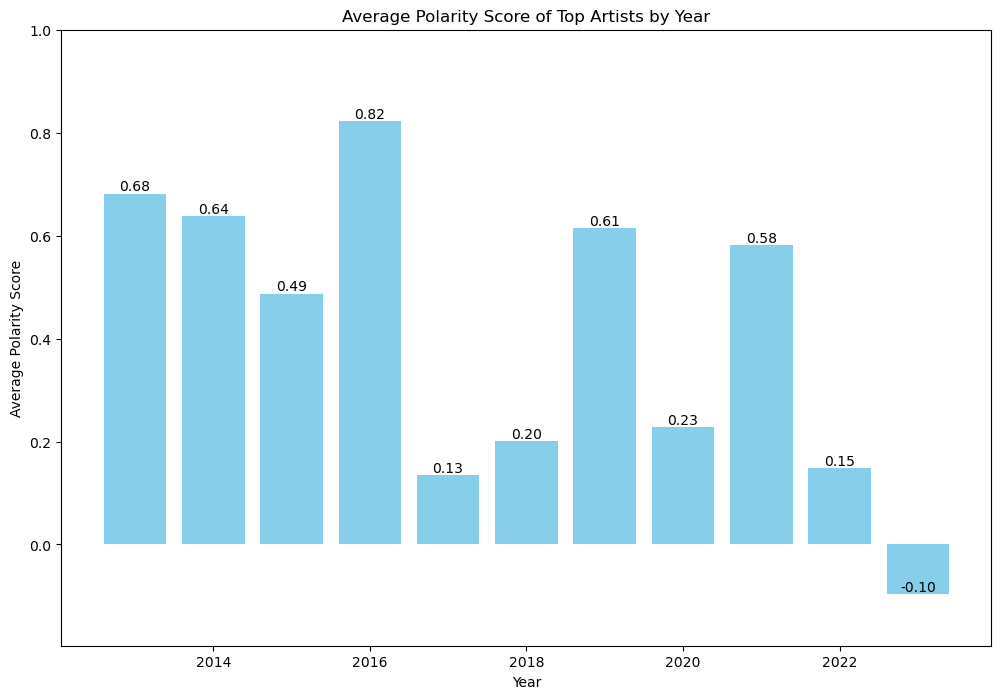

In [3]:
# Step 1: Assign Scores Based on Ranking
# input variables: song rankings, and name of the artists

import helper_function
import pandas as pd
import csv

top_artist_polarityscore = []

# loaded_data = pd.read_csv('billboard_data_with_lyrics')
# scores_by_artist = {}
# artists = helpers.generate(loaded_data)
# print(artists)

# for i in range(100):
#     score = 101 - i  # Calculate the score based on ranking
#     artist = artists[i]
#     if artist in scores_by_artist:
#         scores_by_artist[artist] += score
#     else:
#         scores_by_artist[artist] = score




with open("billboard_data_with_lyrics.csv", mode='r', encoding='utf-8') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Convert it to a list to get the ability to use len() and indexing
    rows = list(csv_reader)
    
    # Now you can iterate using indices
    for j in range(11):
        scores_by_artist = {}
        for i in range(100):
            score = 101 - i  # Calculate the score based on ranking
            artist = rows[j * 100 + i][2]
            if artist in scores_by_artist:
                scores_by_artist[artist] += score
            else:
                scores_by_artist[artist] = score
        # Step 2 & 3: Sort Artists by Total Score
        sorted_artists = sorted(
            scores_by_artist.items(), key=lambda x: x[1], reverse=True
        )


        # Step 4: Select the Top 5 Artists
        top_5_artists = sorted_artists[:5]
        top_5_artist_names = [artist[0] for artist in top_5_artists]
       

        polarity_score = {}
        polarity_count = {}
        #print(top_5_artist_names)
        for i in range(100):
            artist = rows[j * 100 + i][2]
          
            if (artist in top_5_artist_names) == False:
                continue 
            # else:
                # print(artist)
                # print(top_5_artist_names)
                # print(artist in top_5_artist_names)

            
            if artist in polarity_score:
                
                polarity_score[artist] += helper_function.POLARITY(rows[j * 100 + i][4])['compound']
                polarity_count[artist] += 1
            else:
                
                polarity_score[artist] = helper_function.POLARITY(rows[j * 100 + i][4])['compound']
                polarity_count[artist] = 1
        
        for x, y in polarity_score.items():
            #print(polarity_score[x], polarity_count[x])
            polarity_score[x] /= polarity_count[x]
        #print(len(polarity_score))
        top_artist_polarityscore.append(polarity_score)

print(top_artist_polarityscore)

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_artist_polarityscore' is a list of dictionaries
# containing the average polarity scores for the top 5 artists each year
# For example: [{'Artist1': -0.1, 'Artist2': -0.2, ...}, {...}, ...]

# Calculate the range of years
years = np.arange(2013, 2013 + len(top_artist_polarityscore))

# Calculate the average polarity score for each year
average_scores = [np.mean(list(year.values())) for year in top_artist_polarityscore]

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a bar chart
plt.bar(years, average_scores, color='skyblue')

# Make sure the Y-axis starts below zero if there are negative values
plt.ylim([min(average_scores) - 0.1, 1])

# Labeling
plt.title('Average Polarity Score of Top Artists by Year')
plt.xlabel('Year')
plt.ylabel('Average Polarity Score')

# Add value labels on each bar
for i, score in enumerate(average_scores):
    plt.text(years[i], score, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


        

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


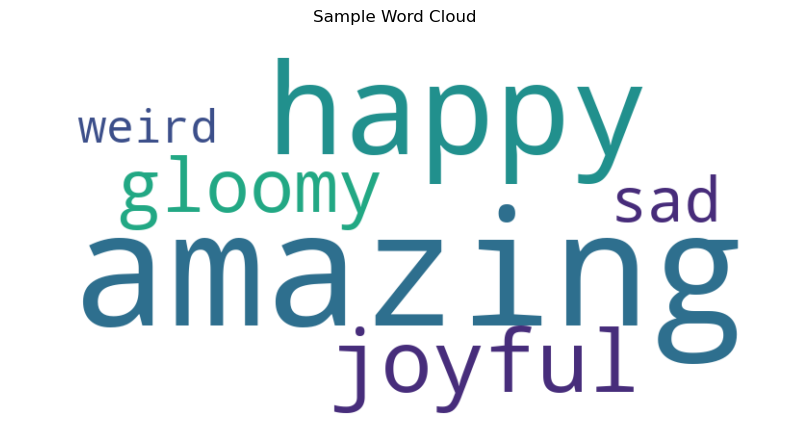

In [13]:
import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

words = ["Im", "Blue", "Dabadee", "You", "Sad", "Die", "Amazing", "Dog"]
for word in words:
    print(analyzer.polarity_scores(word))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dictionary of word frequencies
word_frequencies = {
    'happy': 23,
    'joyful': 17,
    'sad': 8,
    'gloomy': 12,
    'weird' : 4,
    'amazing' : 40
    # Add more words and their frequencies
}

def generate_word_cloud_from_frequencies(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate the word cloud
generate_word_cloud_from_frequencies(word_frequencies, "Sample Word Cloud")



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


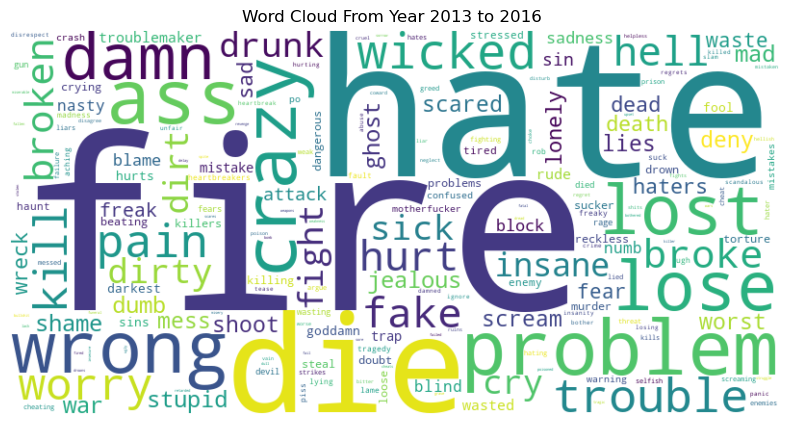

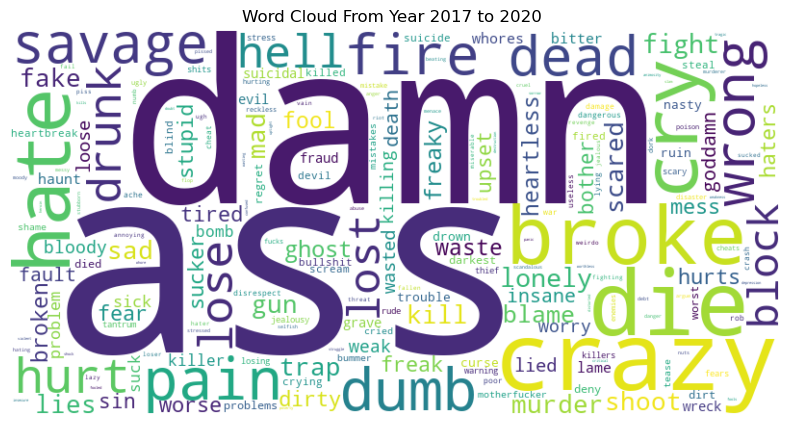

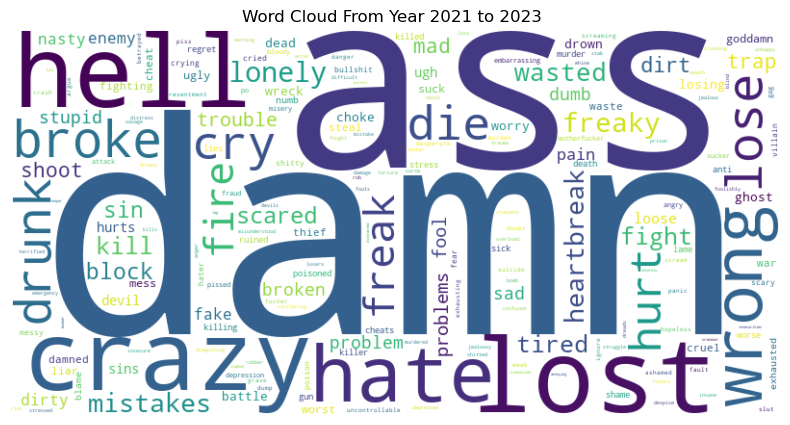

In [10]:
import nltk
import csv
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


def polarity(word):
    return analyzer.polarity_scores(word)


def split_text_into_words(text):
    # Split the text into words based on various non-word characters
    words = re.split(r"\W+", text)
    # Filter out empty strings
    words_list = [word for word in words if word]
    return words_list


csv_file_path = "billboard_data_with_lyrics.csv"

profanity = ["fuck", "bitch", "bitches", "dick", "niggas", "shit", "fucked", "bad"]
with open(csv_file_path, newline="") as csvfile:
    csvreader = csv.reader(csvfile)


    words_dictionary = {}
    words_dictionary1 = {}
    words_dictionary2 = {}
    list_of_dictionary = [
        words_dictionary,
        words_dictionary1,
        words_dictionary2,
    ]

    for count, row in enumerate(csvreader, start=0):
        # Process each row here
        # For example, you can print it

        # apparently "row" is a list? Coz its a data frame so its a list. I didnt kno that lol 
    
        words = split_text_into_words(row[4])
        for word in words:
           
            word = word.lower()
            if word in profanity:
                continue
            if polarity(word)['compound'] < -0.3:
                
                # Choose the correct dictionary based on the count
                current_dict = list_of_dictionary[count // 400]
                # Use get to avoid KeyError, defaulting to 0 if the key doesn't exist
                current_dict[word] = current_dict.get(word, 0) + 1
            

def generate_word_cloud_from_frequencies(frequencies, title):
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


# Generate the word cloud
year = 2013 
for i in range(3):

    generate_word_cloud_from_frequencies(
        list_of_dictionary[i], f"Word Cloud From Year {year} to {year + 3 - (i == 2)} "
    )
    year += 4


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


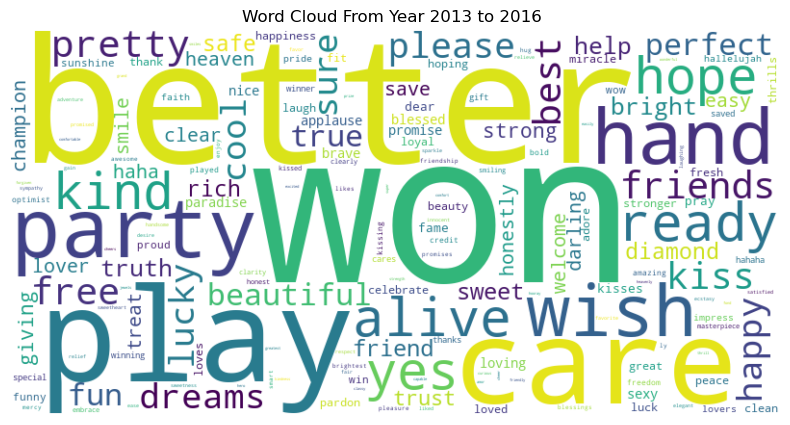

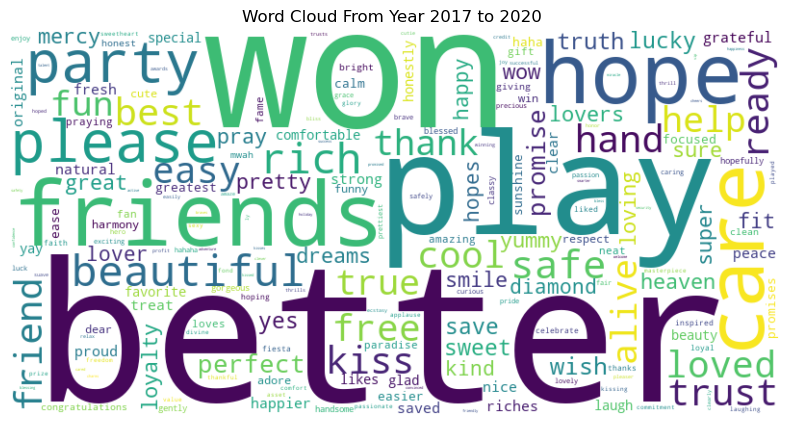

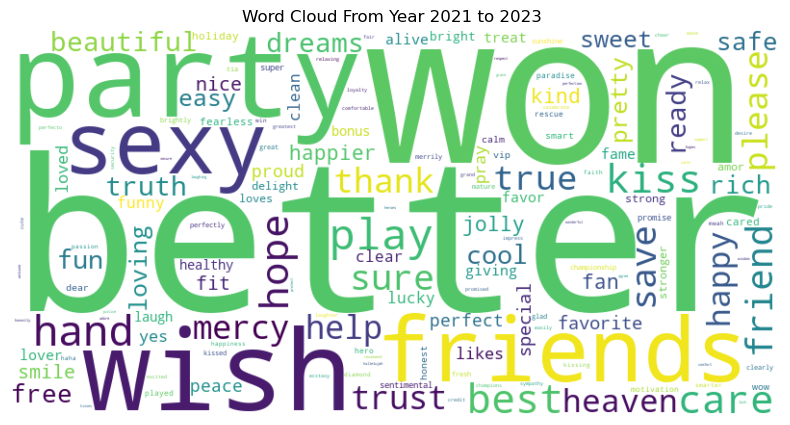

In [14]:
import nltk
import csv
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


def polarity(word):
    return analyzer.polarity_scores(word)


def split_text_into_words(text):
    # Split the text into words based on various non-word characters
    words = re.split(r"\W+", text)
    # Filter out empty strings
    words_list = [word for word in words if word]
    return words_list


csv_file_path = "billboard_data_with_lyrics.csv"

profanity = ["fuck", "bitch", "bitches", "dick", "niggas", "shit", "fucked", "bad"]
irrelavant = ["like", "love", "good", "ha", "woo"]
with open(csv_file_path, newline="") as csvfile:
    csvreader = csv.reader(csvfile)


    words_dictionary = {}
    words_dictionary1 = {}
    words_dictionary2 = {}
    list_of_dictionary = [
        words_dictionary,
        words_dictionary1,
        words_dictionary2,
    ]

    for count, row in enumerate(csvreader, start=0):
        # Process each row here
        # For example, you can print it

        # apparently "row" is a list? Coz its a data frame so its a list. I didnt kno that lol 
    
        words = split_text_into_words(row[4])
        for word in words:
           
            word = word.lower()
            if word in irrelavant:
                continue
            if polarity(word)['compound'] > 0.3:
                
                # Choose the correct dictionary based on the count
                current_dict = list_of_dictionary[count // 400]
                # Use get to avoid KeyError, defaulting to 0 if the key doesn't exist
                current_dict[word] = current_dict.get(word, 0) + 1
            

def generate_word_cloud_from_frequencies(frequencies, title):
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


# Generate the word cloud
year = 2013 
for i in range(3):

    generate_word_cloud_from_frequencies(
        list_of_dictionary[i], f"Word Cloud From Year {year} to {year + 3 - (i == 2)} "
    )
    year += 4


In [38]:

import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
word = "no"
print(analyzer.polarity_scores(word))


{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
import re

def split_text_into_words(text):
    # Split the text into words based on various non-word characters
    words = re.split(r'\W+', text)
    # Filter out empty strings
    words_list = [word for word in words if word]
    return words_list

# Example usage with your provided text snippet
text = "Hey, Macklemore, can we go thrift shopping? lol-lol-lol I am so, confused!!! lol   lmao"
words = split_text_into_words(text)
print(words)


['Hey', 'Macklemore', 'can', 'we', 'go', 'thrift', 'shopping', 'lol', 'lol', 'lol', 'I', 'am', 'so', 'confused', 'lol', 'lmao']
